# Fashion MNIST classification: convolutional neural network
Classification of a subset of fashion MNIST images using a convolutional neural network.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Adapted from a [keras example](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py) and teaching from [CambridgeSpark](https://cambridgespark.com/).

In [2]:
from keras.models import Sequential

from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator  # for normalising etc

from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import load_model

Using TensorFlow backend.


The data are stored in the numpy array file format, in `data.zip`. Load the data:

In [3]:
all_data = np.load('data.zip')
Xtrain = all_data['X_train']
ytrain = all_data['y_train']

In [4]:
print("Xtrain shape: ", Xtrain.shape, "ytrain shape: ", ytrain.shape)
print(type(Xtrain[0,0,0]))

Xtrain shape:  (20000, 28, 28) ytrain shape:  (20000,)
<class 'numpy.float64'>


In [5]:
y_classes, y_class_counts = np.unique(ytrain, return_counts=True)
print("y class values: ", y_classes, "\ny class counts", y_class_counts)

y class values:  [0. 1. 2. 3.] 
y class counts [5000 5000 5000 5000]


The target class is a value between 0-3.
Make text labels for the four classes:

In [6]:
LABELS = ["Sneaker", "Boot", "Shirt", "T-Shirt"]

Check how y classes are distributed across the rows:

Text(0.5, 1.0, 'distribution of ytrain classes across rows')

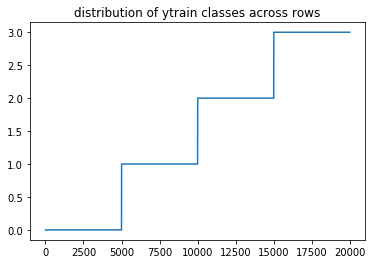

In [7]:
plt.plot(ytrain)
plt.title("distribution of ytrain classes across rows")

Reshape the images for keras, and normalise them:

In [8]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
# normalise data to range 0-1
Xtrain /= 255

Create training and test data from the training data, using train_test_split. 

Stratify on the target class, because the y labels are not randomly ordered across rows.

Use a random seed, for replicability.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, stratify=ytrain, test_size=0.1, random_state=42)

In [10]:
X_train.shape

(18000, 28, 28, 1)

Display some randomly-selected training images with their labels (and class):

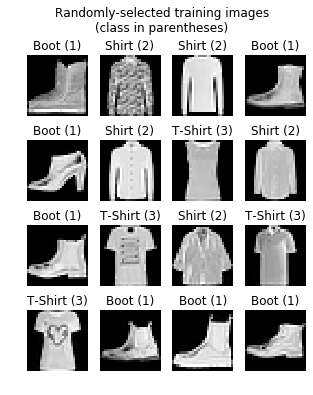

In [11]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected training images\n(class in parentheses)")
for i in range(0,grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(X_train.shape[0]-grid_len)
    response = int(y_train[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(X_train[image_index].reshape(28, 28), cmap="gray")

Convert each y class value from an integer value 0-3, to an array of 4 categories each with value 0-1:

In [12]:
num_classes = 4

In [13]:
y_train = np_utils.to_categorical(y_train, num_classes)  # this must be after train_test_split
y_test = np_utils.to_categorical(y_test, num_classes)  # this has to be after train_test_split

Make a convolutional neural network model with 12 layers in 3 groups:
1. convolution (input), convolution, pool, dropout
2. convolution, convolution, pool, dropout
3. flatten, dense, dropout, dense (output)

Use categorical_crossentropy for the loss function (for categorical outputs), and accuracy as the metric.

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu', name='C2D_1'))
model.add(Conv2D(32, (3, 3), activation='relu', name='C2D_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='C2D_3'))
model.add(Conv2D(64, (3, 3), activation='relu', name='C2D_4'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', name='D_1'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax', name='D_2'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Select hyperparameters and fit the model:

Batch size should be large and divide into the training set size exactly (for speed), while still presenting a few tens of batches each epoch.

In [17]:
batch_size = int(X_train.shape[0]/100)
epochs =30

Print the loss & accuracy for both training and validation, each epoch, using `verbose=2`. Because a neural network can easily converge well on the training measures while simultaneously diverging on the test set!

In [18]:
model_fit = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 18000 samples, validate on 2000 samples
Epoch 1/30
 - 27s - loss: 0.4037 - acc: 0.8319 - val_loss: 0.2462 - val_acc: 0.8905
Epoch 2/30
 - 24s - loss: 0.2580 - acc: 0.8874 - val_loss: 0.2092 - val_acc: 0.9105
Epoch 3/30
 - 24s - loss: 0.2256 - acc: 0.9006 - val_loss: 0.1929 - val_acc: 0.9125
Epoch 4/30
 - 24s - loss: 0.2082 - acc: 0.9078 - val_loss: 0.1829 - val_acc: 0.9245
Epoch 5/30
 - 24s - loss: 0.1967 - acc: 0.9155 - val_loss: 0.1722 - val_acc: 0.9265
Epoch 6/30
 - 29s - loss: 0.1848 - acc: 0.9195 - val_loss: 0.1713 - val_acc: 0.9255
Epoch 7/30
 - 25s - loss: 0.1781 - acc: 0.9222 - val_loss: 0.1561 - val_acc: 0.9365
Epoch 8/30
 - 24s - loss: 0.1670 - acc: 0.9274 - val_loss: 0.1537 - val_acc: 0.9410
Epoch 9/30
 - 26s - loss: 0.1597 - acc: 0.9321 - val_loss: 0.1460 - val_acc: 0.9400
Epoch 10/30
 - 30s - loss: 0.1539 - acc: 0.9344 - val_loss: 0.1471 - val_acc: 0.9450
Epoch 11/30
 - 26s - loss: 0.1499 - acc: 0.9368 - val_loss: 0.1522 - val_acc: 0.9395
Epoch 12/30
 - 25s - loss

Save the model. This preserves it between notebook sessions, and training can also be continued on from the saved, partially-trained state (accuracy & validation will show if this is useful)

Manage the saved model filenames carefully to avoid overwriting different models etc.:

In [19]:
model.save('fmnist_CNN_30.h5')  # creates a HDF5 file 'my_model_CNN.h5'
del model  # deletes the existing model

Load the model, to show that saving and loading the model work :-)

In [20]:
# returns a compiled model
# identical to the previous one
model = load_model('fmnist_CNN_30.h5')

In [21]:
y_probs = model.predict(X_test)

Define a function to pick the most-probable category for each image:

In [22]:
def get_correct_class(y_pred):
    answers = np.zeros(len(y_pred), dtype=np.int)
    for idx, result in enumerate(y_pred):
        objectclass = np.argmax(result)
        answers[idx] = objectclass
    return answers

In [23]:
y_pred = get_correct_class(y_probs)

In [24]:
y_true = get_correct_class(y_test)

In [25]:
metrics.accuracy_score(y_true, y_pred)

0.952

In [26]:
misp_images = X_test[y_true!=y_pred]
print(" number of mis-predicted images is: ", misp_images.shape[0])

 number of mis-predicted images is:  96


Show a random set of mis-predicted test images with predicted labels:

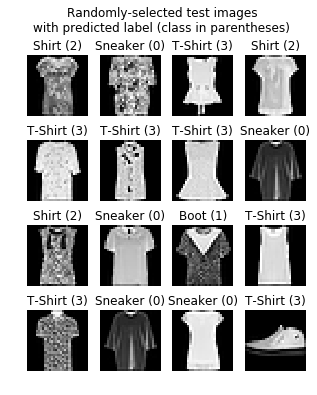

In [27]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected test images\nwith predicted label (class in parentheses)")
for i in range(0, grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(misp_images.shape[0]-grid_len)
    response = int(y_pred[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(misp_images[image_index].reshape(28, 28), cmap="gray")

Plot the model's fit history (thanks to https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ )

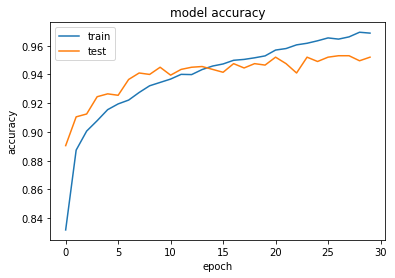

In [28]:
plt.plot(model_fit.history['acc'])
plt.plot(model_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

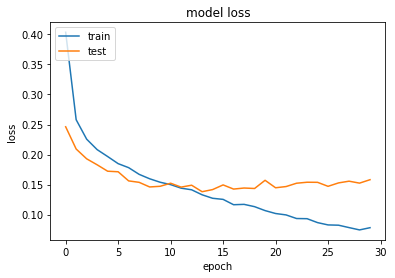

In [29]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

This is an OK number of epochs to train for (manually determined), but it looks like training could have stopped much earlier. Further training will show testing loss and accuracy starting to worsen, even while training loss & accuracy still improve.